In [65]:
import mysql.connector
import pandas as pd


O que escrever no documento:

Documento, entre 5 e 10 páginas, relatório do que foi feito e justificar

In [66]:
%pip install mysql-connector-python pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
db_config = {
    'host': '192.168.137.4',  # Endereço do MySQL no Docker (localhost ou o IP do contêiner), no caso do meu notebook é 192.168.137.4
    'port': 3306,         # Porta do MySQL
    'user': 'root',       # Usuário do MySQL
    'password': 'rootpassword',  # Senha configurada no Docker
    'database': 'N3'      # Nome do banco de dados
}
connection = mysql.connector.connect(**db_config)
query = "SELECT * FROM consumo_energia_eletrica;"
df = pd.read_sql(query, connection)
connection.close()
print(df)


/tmp/ipykernel_11386/2540814610.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


        ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
0      2004    1       RN       Outros              40857.0    69617
1      2004    1       SP       Outros             311650.0   937538
2      2004    1       MS       Outros              56881.0    67601
3      2004    1       SC       Outros             226165.0   209380
4      2004    1       RJ       Outros              70634.0   416128
...     ...  ...      ...          ...                  ...      ...
25915  2023   12       BA  Residencial            5932740.0   718461
25916  2023   12       PA  Residencial            2614106.0   478726
25917  2023   12       AC  Residencial             245699.0    58301
25918  2023   12       RN  Residencial            1390080.0   210119
25919  2023   12       SC  Residencial            2719791.0   655389

[25920 rows x 6 columns]


In [68]:
df.columns.to_list()

['ano', 'mes', 'sigla_uf', 'tipo_consumo', 'numero_consumidores', 'consumo']

In [69]:
print(df.head())


    ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
0  2004    1       RN       Outros              40857.0    69617
1  2004    1       SP       Outros             311650.0   937538
2  2004    1       MS       Outros              56881.0    67601
3  2004    1       SC       Outros             226165.0   209380
4  2004    1       RJ       Outros              70634.0   416128


In [70]:
print(df.describe())
print(df.isnull().sum())


                ano           mes  numero_consumidores       consumo
count  25920.000000  25920.000000         2.592000e+04  2.592000e+04
mean    2013.500000      6.500000         6.823034e+05  3.391709e+05
std        5.766393      3.452119         1.839312e+06  6.036427e+05
min     2004.000000      1.000000         5.200000e+01  3.540000e+02
25%     2008.750000      3.750000         1.895650e+04  6.154550e+04
50%     2013.500000      6.500000         1.081745e+05  1.367545e+05
75%     2018.250000      9.250000         4.424120e+05  3.616518e+05
max     2023.000000     12.000000         1.920126e+07  4.849895e+06
ano                    0
mes                    0
sigla_uf               0
tipo_consumo           0
numero_consumidores    0
consumo                0
dtype: int64


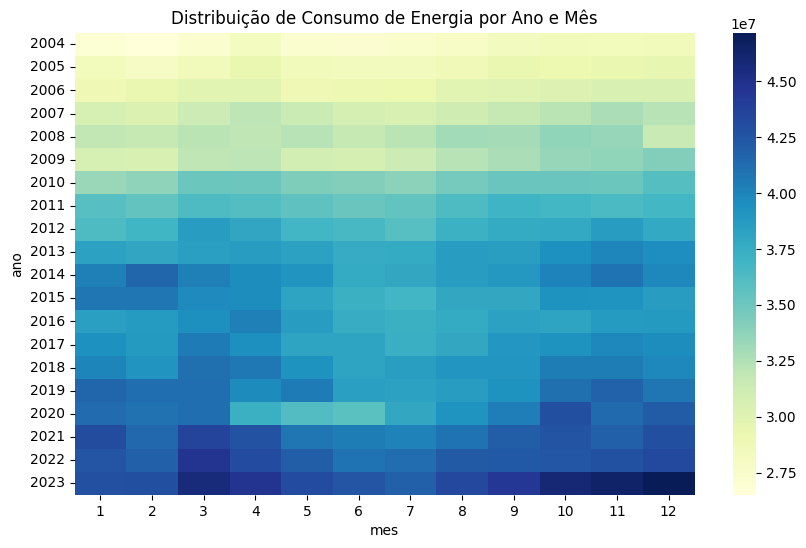

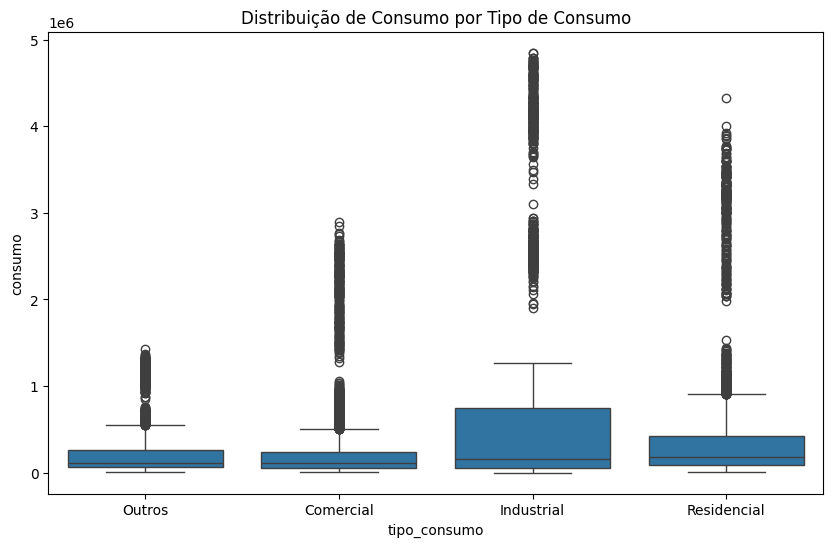

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(values='consumo', index='ano', columns='mes', aggfunc='sum'), cmap='YlGnBu')
plt.title('Distribuição de Consumo de Energia por Ano e Mês')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_consumo', y='consumo', data=df)
plt.title('Distribuição de Consumo por Tipo de Consumo')
plt.show()


In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sigla_uf_encoded'] = label_encoder.fit_transform(df['sigla_uf'])
df['tipo_consumo_encoded'] = label_encoder.fit_transform(df['tipo_consumo'])


In [73]:
X = df[['ano', 'mes', 'sigla_uf_encoded', 'tipo_consumo_encoded', 'numero_consumidores']]
y = df['consumo']


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'MSE (Regressão Linear): {mse_lr}')
print(f'R2 (Regressão Linear): {r2_lr}')


MSE (Regressão Linear): 259602195469.6708
R2 (Regressão Linear): 0.30515543196663786


In [76]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prevendo os valores no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Avaliação do modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE (Random Forest): {mse_rf}')
print(f'R2 (Random Forest): {r2_rf}')


MSE (Random Forest): 883081775.7618694
R2 (Random Forest): 0.9976363660025784


In [77]:
print("sigla uf encoded: \n",df['sigla_uf_encoded'], "\nTipo consumo encoded:\n", df['tipo_consumo_encoded'].tail(10))

sigla uf encoded: 
 0        19
1        25
2        11
3        23
4        18
         ..
25915     4
25916    13
25917     0
25918    19
25919    23
Name: sigla_uf_encoded, Length: 25920, dtype: int64 
Tipo consumo encoded:
 25910    3
25911    3
25912    3
25913    3
25914    3
25915    3
25916    3
25917    3
25918    3
25919    3
Name: tipo_consumo_encoded, dtype: int64


In [78]:
df.tail()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,sigla_uf_encoded,tipo_consumo_encoded
25915,2023,12,BA,Residencial,5932740.0,718461,4,3
25916,2023,12,PA,Residencial,2614106.0,478726,13,3
25917,2023,12,AC,Residencial,245699.0,58301,0,3
25918,2023,12,RN,Residencial,1390080.0,210119,19,3
25919,2023,12,SC,Residencial,2719791.0,655389,23,3


In [89]:
# Dados de entrada para previsão
novos_dados = pd.DataFrame({
    'ano': [2023],
    'mes': [12],
    'sigla_uf_encoded': [23],  # Codificando o estado
    'tipo_consumo_encoded': [3],  # Codificando o tipo de consumo
    'numero_consumidores': [2719791.0]
})

# Prevendo o consumo para os novos dados
consumo_predito = model_rf.predict(novos_dados)
print(f'Consumo previsto: {consumo_predito[0]}')


Consumo previsto: 626948.89


In [90]:
consumo_real = 655389.00
diferenca = consumo_real-consumo_predito
print("Diferença entre consumo real e predito: ", diferenca, " ou seja, uma diferença de", (diferenca*100)/consumo_real,"%")

Diferença entre consumo real e predito:  [28440.11]  ou seja, uma diferença de [4.33942437] %


In [91]:
#outra predção
novos_dados = pd.DataFrame({
    'ano': [2023],
    'mes': [12],
    'sigla_uf_encoded': [19],  # Codificando o estado
    'tipo_consumo_encoded': [3],  # Codificando o tipo de consumo
    'numero_consumidores': [1390080.0]
})

# Prevendo o consumo para os novos dados
consumo_predito = model_rf.predict(novos_dados)
print(f'Consumo previsto: {consumo_predito[0]}')

Consumo previsto: 209598.36


In [92]:
consumo_real = 210119.00
diferenca = consumo_real-consumo_predito
print("Diferença entre consumo real e predito: ", diferenca, " ou seja, uma diferença de", (diferenca*100)/consumo_real,"%")

Diferença entre consumo real e predito:  [520.64]  ou seja, uma diferença de [0.2477834] %
